## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('MSFT_2000.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(250, 10))

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
        77.610001],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], shape=(250, 10))

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list


array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 74.87513905,  76.58165351,  78.72496125, ...,  78.71060479,
         76.32158271,  77.9085896 ],
       [ 75.88938058,  77.45415336,  78.90374238, ...,  77.30582934,
         76.52936212,  77.05359085],
       ...,
       [ 81.96930027,  83.820465  ,  72.90459066, ...,  56.07207109,
        105.02171933,  85.446941  ],
       [ 83.93266286,  83.34535486,  72.94968938, ...,  56.53037541,
        101.94959075,  86.23412606],
       [ 84.45481289,  86.56018052,  73.20150416, ...,  56.33167074,
        102.45134915,  84.97702663]], shape=(250, 10))

Finally, plot the obtained price list data.

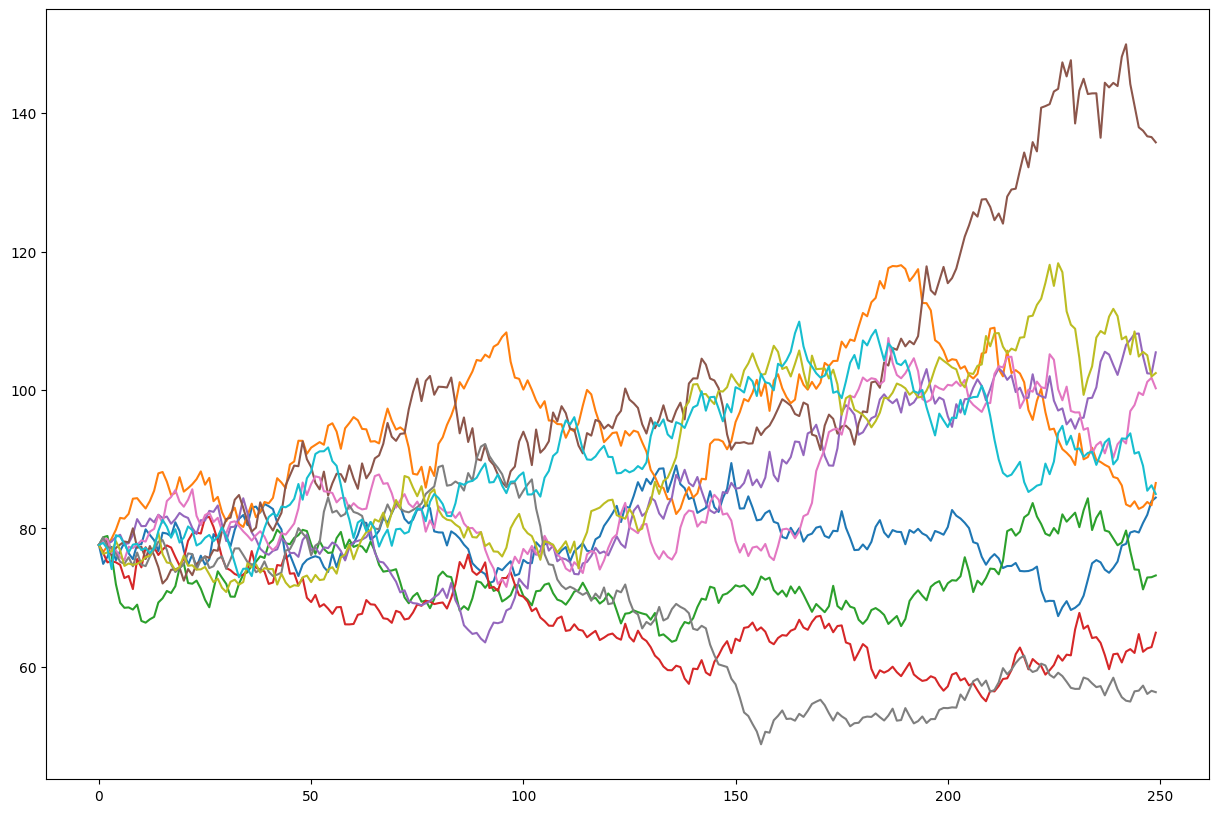

In [7]:
plt.figure(figsize=(15,10))
plt.plot(price_list)
plt.show()